# Data Augmentation

Data augmentation occurs when you create new data based on modifications of your existing data. In our case, our data will be images.Data augmentation on images would include transformations like:
 - Flipping the image either horizontally or vertically
 - Rotating the image
 - Zooming in or out on the image
 - Cropping the image
 - Varying the color on the image

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
# 텐서플로우 문서에 있는 plotImages() 함수를 사용해 전처리된 이미지를 주피터 노트북에 그린다.

In [3]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [4]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True)

In [77]:
chosen_image = random.choice(os.listdir('data/dogs-vs-cats/train/dog'))

In [78]:
chosen_image

'dog.10615.jpg'

In [34]:
image_path = 'data/dogs-vs-cats/train/dog/' + chosen_image

In [35]:
os.getcwd()

'C:\\Users\\USER\\20. 패스트캠퍼스_한국기술\\2일차\\Keras-ML-DL-DeepLizard-master'

In [36]:
# 이미지를 얻는다.
image = np.expand_dims(plt.imread(image_path),0)

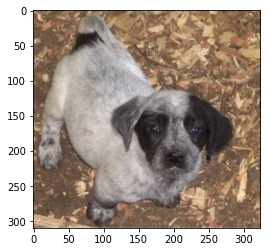

In [37]:
plt.imshow(image[0])

In [39]:
# 증강이미지 배치를 생성한다.
aug_iter=gen.flow(image)

In [41]:
# 증강된 이미지 10개를 얻는다.
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

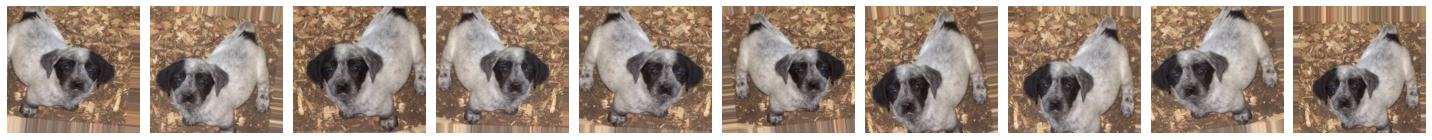

In [43]:
plotImages(aug_images)

In [49]:
# aug_iter=gen.flow(image, save_to_dir='data/dogs-vs-cats/train/dog', save_prefix='aug-image-', save_format='jpeg')

In [62]:
# 데이터 증강 저장

In [81]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode= 'nearest')

img = load_img('data/dogs-vs-cats/train/cat/cat.2591.jpg')  # PIL 이미지
x = img_to_array(img)  # (3, 150, 150) 크기의 NumPy 배열
x = x.reshape((1,) + x.shape)  # (1, 3, 150, 150) 크기의 NumPy 배열

# 아래 .flow() 함수는 임의 변환된 이미지를 배치 단위로 생성해서
# 지정된 `preview/` 폴더에 저장합니다.
i = 0
for batch in datagen.flow(x, 
                          batch_size=1,
                          save_to_dir='preview', 
                          #save_prefix='cat',  
                          save_format='jpeg'):
    i += 1
    if i > 20:
        break  # 이미지 20장을 생성하고 마칩니다